## ПРАКТИЧНА РОБОТА 7.2

### Варіант 15

##### Завдання 2. Аналіз і візуалізація даних

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calendar

In [2]:
#Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки. 

df = pd.read_csv("museum_visitors.csv", encoding='latin-1')

In [3]:
#Вивести перші 5 рядків датасету. 

print(df.head())

         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


In [4]:
#Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків)

num_rows, num_columns = df.shape
print(f"Кількість рядків: {num_rows}, Кількість стобчиків: {num_columns}")

print("Тип даних: \n", df.dtypes)

missing_sum = df.isnull().sum()
print("Сума пропусків в кожній колонці: ")
print(missing_sum)

Кількість рядків: 59, Кількість стобчиків: 5
Тип даних: 
 Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object
Сума пропусків в кожній колонці: 
Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


In [5]:
#Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів). 

duplicates = df[df.duplicated()]

print('Кількість дублікатів: ', len(duplicates))

Кількість дублікатів:  0


In [6]:
#Про які роки містить інформацію датасет. 

years = df['Date'].str.split('-').str[0].unique()
print('Роки про які містить інформацію датасет:')
for year in years:
    print(year)

Роки про які містить інформацію датасет:
2014
2015
2016
2017
2018


In [7]:
#Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення (date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center).
new_cols_names = {
    'Date': 'date',
    'Avila Adobe': 'avila_adobe',
    'Firehouse Museum': 'firehouse_museum',
    'Chinese American Museum':'chinese_american_museum',
    'America Tropical Interpretive Center': 'america_tropical_interpretive_center'
}
df.rename(columns=new_cols_names, inplace=True)
print(df.head())

         date  avila_adobe  firehouse_museum  chinese_american_museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   america_tropical_interpretive_center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


In [8]:
#Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.
average_visitors = round(df.drop(columns=['date']).mean())
print('Середня кількість відвідувачів: ')
print(average_visitors)

Середня кількість відвідувачів: 
avila_adobe                             24062.0
firehouse_museum                         6473.0
chinese_american_museum                  2721.0
america_tropical_interpretive_center     7107.0
dtype: float64


In [9]:
#Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік 

df_2018 = df[df['date'].str.startswith('2018')]
min_visitors_2018 = df.drop(columns=['date']).min()
max_visitors_2018 = df.drop(columns=['date']).max()

print('Мінімальна кількість відвідувачів музею за 2018 рік: \n', min_visitors_2018)
print('Максимальна кількість відвідувачів музею за 2018 рік: \n', max_visitors_2018)

Мінімальна кількість відвідувачів музею за 2018 рік: 
 avila_adobe                             14035
firehouse_museum                         3306
chinese_american_museum                  1073
america_tropical_interpretive_center     2824
dtype: int64
Максимальна кількість відвідувачів музею за 2018 рік: 
 avila_adobe                             41242
firehouse_museum                        61192
chinese_american_museum                  7702
america_tropical_interpretive_center    13490
dtype: int64


In [10]:
#Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри).

df_2015 = df[df['date'].str.startswith('2015')]
cols_sum = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
tot_visit_month_2015 = df_2015.groupby(df_2015['date'].str.split("-").str[1].astype(int))[cols_sum].sum()
month_names = [calendar.month_name[i] for i in tot_visit_month_2015.index]
month_with_highest_vist_2015 = tot_visit_month_2015.idxmax()
month_with_lowest_vist_2015 = tot_visit_month_2015.idxmin()

month_with_highest_vist_2015 = month_with_highest_vist_2015.iloc[1]
month_with_lowest_vist_2015 = month_with_lowest_vist_2015.iloc[1]

print('Місяць з найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року: \n', month_names[month_with_lowest_vist_2015])
print('Місяць з найвищою загальною кількістю відвідувачів серед усіх музеїв для 2015 року: \n', month_names[month_with_highest_vist_2015])

Місяць з найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року: 
 March
Місяць з найвищою загальною кількістю відвідувачів серед усіх музеїв для 2015 року: 
 June


In [11]:
#Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року 

summer_months = [6, 7, 8]
winter_months = [12, 1, 2]
summer = df_2018[df_2018['date'].str.split("-").str[1].astype(int).isin(summer_months)]
winter = df_2018[df_2018['date'].str.split("-").str[1].astype(int).isin(winter_months)]

summer_visitor = summer['avila_adobe'].sum()
winter_visitor = winter['avila_adobe'].sum()

print('Kількість відвідувачів музею "Avila Adobe" у літні місяці 2018 року: ', summer_visitor)
print('Kількість відвідувачів музею "Avila Adobe" у зимові місяці 2018 року: ', winter_visitor)

Kількість відвідувачів музею "Avila Adobe" у літні місяці 2018 року:  66122
Kількість відвідувачів музею "Avila Adobe" у зимові місяці 2018 року:  30983


In [12]:
#Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році
df_2016 = df[df['date'].str.startswith('2016')]
cols = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
visitors_data = df_2016[cols]
correlation = visitors_data.corr()
print('Koреляція між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році: ')
print(correlation)

Koреляція між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році: 
                                      avila_adobe  firehouse_museum  \
avila_adobe                              1.000000          0.737200   
firehouse_museum                         0.737200          1.000000   
chinese_american_museum                  0.089054          0.553935   
america_tropical_interpretive_center     0.436561          0.247389   

                                      chinese_american_museum  \
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
avila_adobe                                                       0.436561  
firehouse_museum                                                  0.247389  
chines

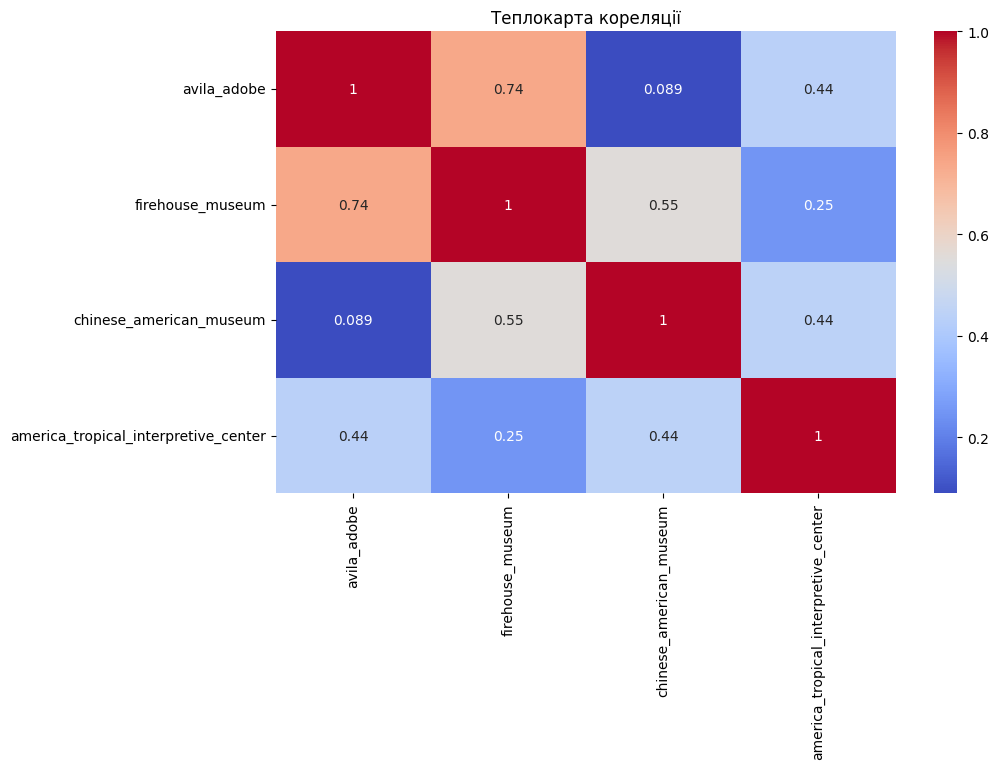

In [13]:
#Побудувати теплокарту кореляції для попереднього завдання. 
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot = True, cmap="coolwarm")
plt.title("Теплокарта кореляції")
plt.show()

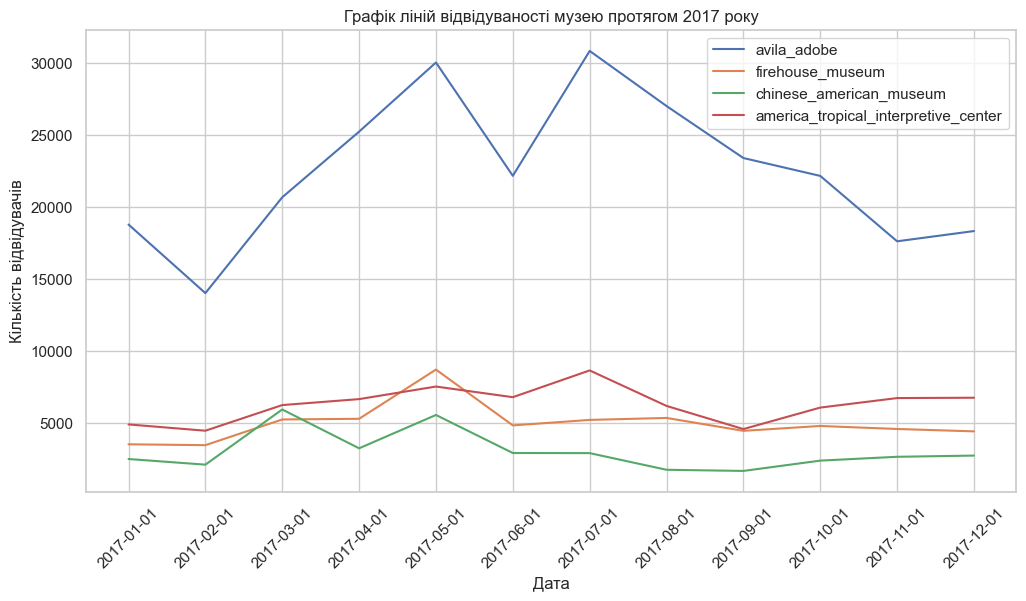

In [14]:
#Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року. 
df_2017 = df[df['date'].str.startswith('2017')]
sns.set(style="whitegrid")
visitors_cols = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
plt.figure(figsize=(12, 6))
for museum in visitors_cols:
    sns.lineplot(data= df_2017, x='date', y=df_2017[museum], label=museum)
plt.title("Графік ліній відвідуваності музею протягом 2017 року")
plt.xlabel("Дата")
plt.ylabel("Кількість відвідувачів")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

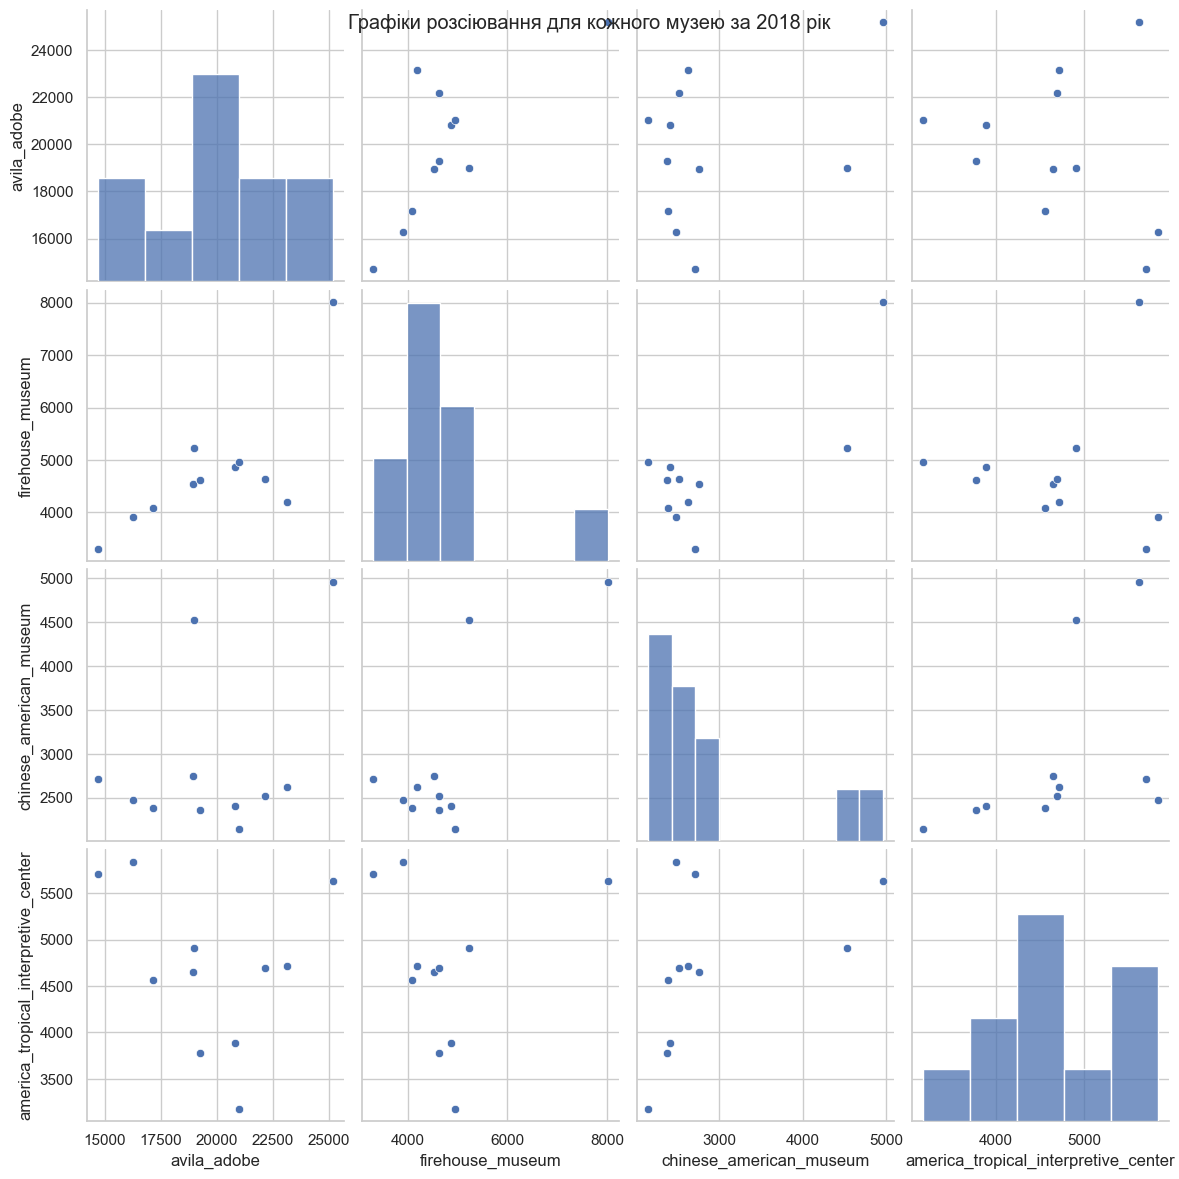

In [15]:
#Побудувати графіки розсіювання для кожного музею за 2018 рік
sns.set(style="whitegrid")
cols = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
sns.pairplot(data=df_2018, vars=cols, height=3)
plt.suptitle("Графіки розсіювання для кожного музею за 2018 рік")
plt.show()

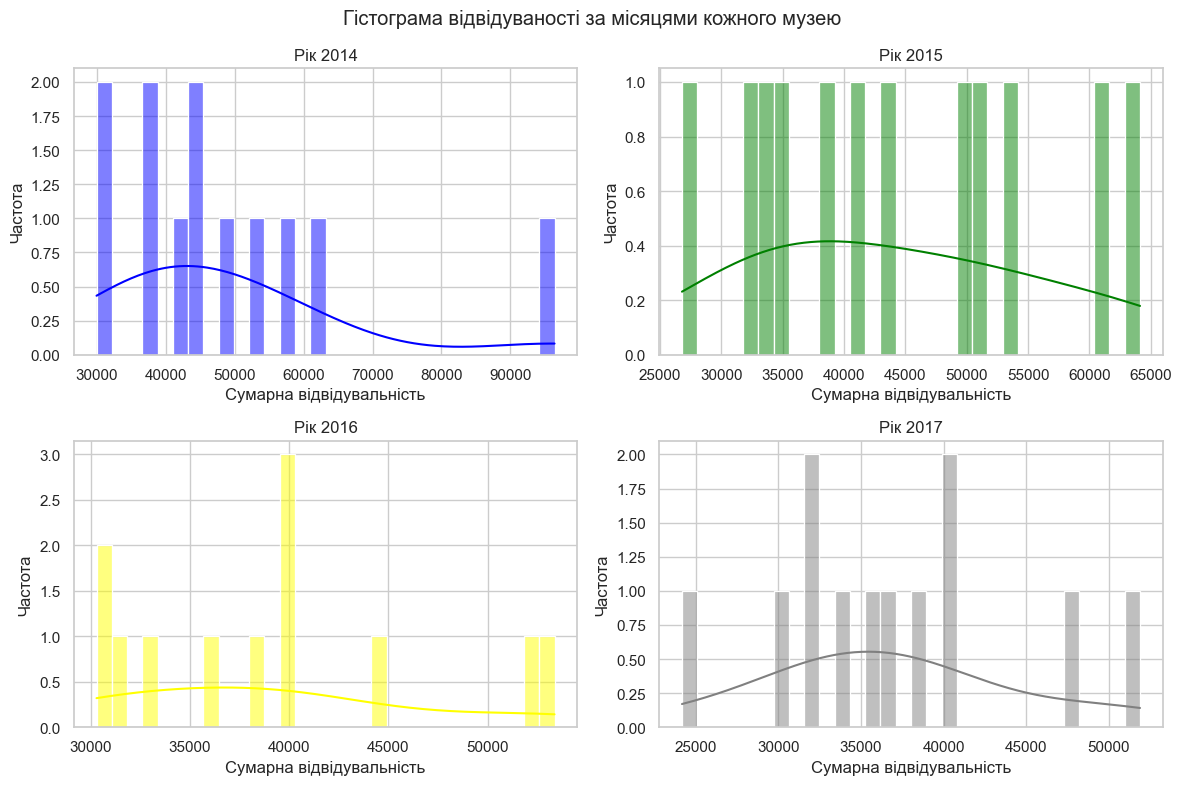

In [16]:
#Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.
df_2014 = df[df['date'].str.startswith('2014')]
sns.set(style="whitegrid")
visitors_cols = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
fig, axes = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle("Гістограма відвідуваності за місяцями кожного музею")
colors = ['blue', 'green', 'yellow', 'grey']
for i, df_year in enumerate([df_2014, df_2015, df_2016, df_2017]):
    sum_visitors = df_year[visitors_cols].sum(axis=1)
    ax = axes[i // 2, i % 2]
    sns.histplot(data=sum_visitors, bins=30, kde = True, ax=ax, color=colors[i])
    ax.set_title(f"Рік {i + 2014}")
    ax.set_xlabel("Сумарна відвідувальність")
    ax.set_ylabel("Частота")
plt.tight_layout()
plt.grid(True)
plt.show()

Висновок: На практичній роботі я вдосконалила знання і навички з обробки даних, аналізу даних, візуалізації та використання бібліотек Pandas, Matplotlib та Seaborn у середовищі Python.